TEXT ANALISA

In [325]:
#Import Library Text Processing
import re #librar Regular Expression
import pandas as pd #library data manipulation
import sqlite3 #library database

 #library visualisasi 3D
import seaborn as sns
import matplotlib.pyplot as plt

 # Library untuk membandingkan variable
import numpy as np

In [326]:
#Read Data.csv
df = pd.read_csv('data.csv', encoding='latin-1')
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


PENGUMPULAN DATA

In [327]:
#Cek Shape data hatespeech dari data uji
df.HS.value_counts()

HS
0    7608
1    5561
Name: count, dtype: int64

In [328]:
#Kolom Data Tweet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [329]:
#Data Tweet Duplicate
print('Data Duplicate pada data tweet terdapat {} data'.format(df.duplicated().sum()))

Data Duplicate pada data tweet terdapat 125 data


In [330]:
#Membersihkan Duplicate Data Tweet
df = df.drop_duplicates()
print('Data Duplicate pada data tweet terdapat {} data'.format(df.duplicated().sum()))

Data Duplicate pada data tweet terdapat 0 data


In [331]:
#Data tweet yangsudah dibersihkan
df.shape

(13044, 13)

In [332]:
#Menjumlahkan kolom jenis Hatespeech
selected_cols = ['HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other']
total = df[selected_cols].sum()
sorted_total = total.sort_values(ascending=False)
print(sorted_total)

HS_Other         3706
HS_Individual    3540
HS_Group         1978
HS_Religion       789
HS_Race           563
HS_Physical       322
HS_Gender         304
dtype: int64


C:\Users\nindi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nindi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nindi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

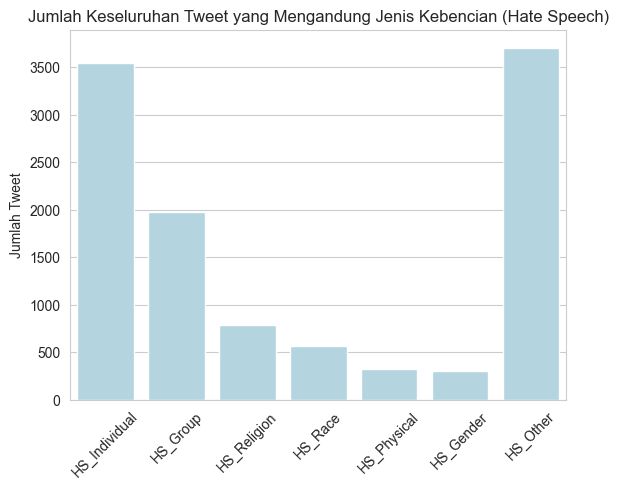

In [333]:
#Visualiasasi Tweet Hatespeech
sns.set_style('whitegrid')
sns.barplot(x=total.index, y=total.values, color='lightblue')
plt.xticks(rotation=45)
plt.title('Jumlah Keseluruhan Tweet yang Mengandung Jenis Kebencian (Hate Speech)')
plt.ylabel('Jumlah Tweet')
plt.show()

In [334]:
#Shape data abusive dari data uji
df.Abusive.value_counts()

Abusive
0    8039
1    5005
Name: count, dtype: int64

- TEXT PREPROCESSING

In [335]:
# Mengubah semua huruf menjadi huruf kecil
def lowercase(s):
    return s.lower()

In [336]:
# Hapus Semua Tanda Baca dan Kata yang Tidak Diperlukan
def punctuation(s):
    s = re.sub('[^0-9a-zA-Z]+', ' ', s) #menghilangkan semua karakter yang bukan huruf atau angka dan menggantinya dengan spasi.
    s = re.sub('^rt',' ', s) #menghapus awalan rt
    s = re.sub(r'\d+', '', s) #menghapus semua angka
    s = re.sub('user',' ', s) #menghapus kata 'user'
    s = re.sub(r':', ' ', s) #menggantikan karakter : dengan spasi
    s = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ', s) #menghapus semua URL
    s = re.sub('url',' ', s) #menghapus kata 'url' 
    s = re.sub(' +', ' ', s) #menggantikan satu atau lebih spasi berturut-turut dengan satu spasi 
    s = re.sub('\n',' ',s) #menggantikan karakter newline (\n) dengan spasi 
    s = re.sub(r'pic.twitter.com.[\w]+', ' ', s) #menghapus semua tautan Twitter (pic.twitter.com)
    return s

In [337]:
#Mengambil Kembali kamusalay
db = sqlite3.connect('kamusalay_database.db', check_same_thread = False)
q_kamusalay = 'SELECT * FROM kamusalay'
t_kamusalay = pd.read_sql_query(q_kamusalay, db)

In [338]:
# Fungsi Replace Kata Alay ke Kata Normal
alay_dict = dict(zip(t_kamusalay['alay'], t_kamusalay['normal']))
def alay_to_normal(s):
    for word in alay_dict:
        return ' '.join([alay_dict[word] if word in alay_dict else word for word in s.split(' ')])

In [339]:
# Mengambil Kembali Stopword
db = sqlite3.connect('stopword_database.db', check_same_thread=False)
q_stopword = 'SELECT * FROM stopword'
t_stopword = pd.read_sql_query(q_stopword, db)

In [340]:
# Fungsi Stopword Removal
def stopword_removal(s):
    stopword_words = set(t_stopword['STOPWORD'])
    words = s.split()
    filtered_words = [word for word in words if word not in stopword_words]
    return ' '.join(filtered_words)

In [341]:
#Fungsi Text Cleansing tanpa Stopword Removal
def text_cleansing(s):
    s = lowercase(s)
    s = punctuation(s)
    s = alay_to_normal(s)
    return s

#Fungsi Text Cleansing dengan Stopword Removal
def text_cleansing_2(s):
    s = lowercase(s)
    s = punctuation(s)
    s = alay_to_normal(s)
    s = stopword_removal(s)
    return s

In [342]:
#Membersihkan Data Tweet dengan text_cleansing
df['Tweet'] = df['Tweet'].apply(text_cleansing)
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0
2,kadang aku berpikir kenapa aku tetap percaya ...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0


Memberi label pada kalimat data tweet

In [343]:
# Menambhakan kolom Label pada kalimat data tweet
import numpy as np
df['Label'] = np.where((df['HS'] == 0) & (df['Abusive'] == 0), 'Netral', 
                             np.where((df['HS'] == 1) & (df['Abusive'] == 0), 'Hatespeech',
                                      np.where((df['HS'] == 0) & (df['Abusive'] == 1), 'Abusive', 'Toxic')
                                              )
                                     )
print(df['Label'].unique())

['Toxic' 'Abusive' 'Netral' 'Hatespeech']


In [344]:
df.Label.value_counts()

Label
Netral        5783
Toxic         3262
Hatespeech    2256
Abusive       1743
Name: count, dtype: int64

In [345]:
#Memberi Label Sentiment pada data tweet
df['Sentiment'] = df['Label'].apply(lambda x: 'Positive' if x == 'Netral' else 'Negative')
df.Sentiment.value_counts()

Sentiment
Negative    7261
Positive    5783
Name: count, dtype: int64

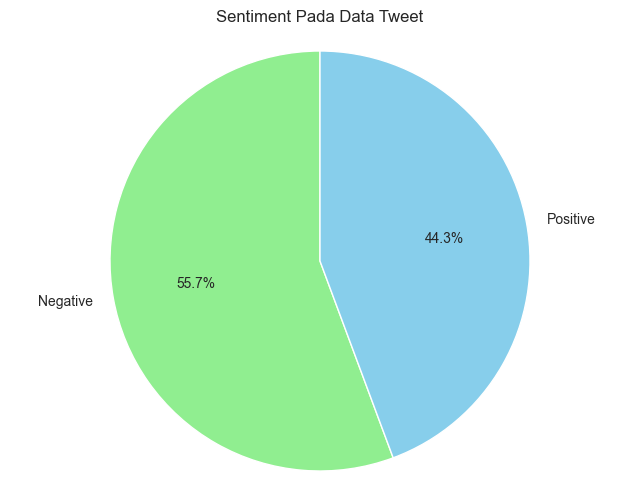

In [346]:
# Hitung jumlah tweet untuk setiap kategori sentiment
counts = df['Sentiment'].value_counts()

# Buat diagram lingkaran menggunakan Matplotlib
plt.figure(figsize=(8,6))
plt.title('Sentiment Pada Data Tweet')
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'skyblue'])
plt.axis('equal')
plt.show()